In [2]:
#CNN Model:
#pooling has no use with the depth, pooling only works with the width and height.
#pooling is used to reduce the size of the image.
#pooling is used to reduce the number of parameters and computation in the network.
#stride is the step size of the filter. (stride = 1 means the filter will move 1 pixel at a time)
#max pooling is preferrable for most cases. (max pooling is used to extract the most important features of the image) (most intense pixel) (very sueful for edge detection for example)
#the bigger the stride the smaller the output size.

In [3]:
import tensorflow as tf
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator                        #to get the dataset (images) from the local machine and to do the data augmentation.

In [4]:
_URL = 'https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip'           #the link for the dataset

In [5]:
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filtered.zip', origin=_URL, extract=True)   #downloading the dataset

In [6]:
import os                                                                                           #to import commands from linux.
base_dir = "D:/Studies/NTI - machine learning on cloud/Machine Learning/cats_and_dogs_filtered"     #to create a path to the folder where the images are stored.


In [7]:
train_dir = os.path.join(base_dir, 'train')                                      #to create a path to the folder where the training images are stored.
val_dir = os.path.join(base_dir, 'validation')                                   #to create a path to the folder where the validation images are stored.

#to create a path to the folder where the training cat, dgos & validation cats,dags images are stored.
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

val_cats_dir = os.path.join(val_dir, 'cats')
val_dogs_dir = os.path.join(val_dir, 'dogs')

In [8]:

num_cats_tr = len(os.listdir(train_cats_dir))                                   #to count the number of training cats images.
num_dogs_tr = len(os.listdir(train_dogs_dir))                                    #to count the number of training dogs images.
num_cats_val = len(os.listdir(val_cats_dir))                                     #to count the number of validation cats images.
num_dogs_val = len(os.listdir(val_dogs_dir))                                     #to count the number of validation dogs images.

total_train = num_cats_tr + num_dogs_tr                                           #to count the total number of training images.
total_val = num_cats_val + num_dogs_val                                           #to count the total number of validation images.

In [9]:
print(num_cats_tr)
print(num_dogs_tr)
print(num_cats_val)
print(num_dogs_val)
print(total_train)
print(total_val)

1000
1000
500
500
2000
1000


In [10]:
#we notice that the data is splitted to 50% validation and 50% training and this is not good.
#we will be using data augmentation to increase the training data.

In [11]:
def plotImages(image_arr):
    fig , axes = plt.subplots(1,5,figsize=(20,20))
    axes = axes.flatten()
    for img,ax in zip(image_arr,axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()
    

In [12]:
#Data Augmentation:
batch_size = 100
imgshape = 150
image_gen = ImageDataGenerator(rescale=1./255 , horizontal_flip=True)
train_data_gen = image_gen.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(imgshape,imgshape))

Found 2000 images belonging to 2 classes.


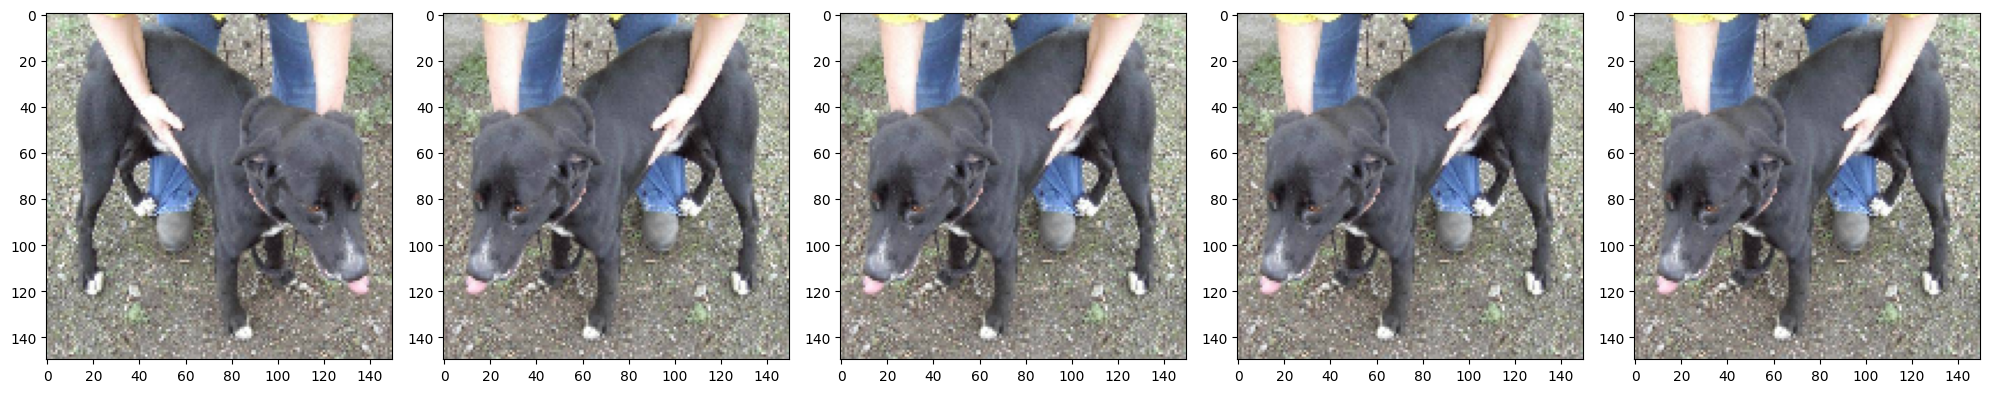

In [13]:
aug_imgs = [train_data_gen[0][0][0] for i in range(5)]
plotImages(aug_imgs)

In [14]:
#this isn't as good so here is another more augmented version:
#Data Augmentation:
batch_size = 100
imgshape = 150
image_gen_new = ImageDataGenerator(rescale=1./255 , horizontal_flip=True , zoom_range=0.2 , shear_range=0.2 , height_shift_range=0.2 , width_shift_range=0.2 , rotation_range=40)
train_data_gen_new = image_gen_new.flow_from_directory(batch_size=batch_size, directory=train_dir, shuffle=True, target_size=(imgshape,imgshape) , class_mode='binary', seed=42)

Found 2000 images belonging to 2 classes.


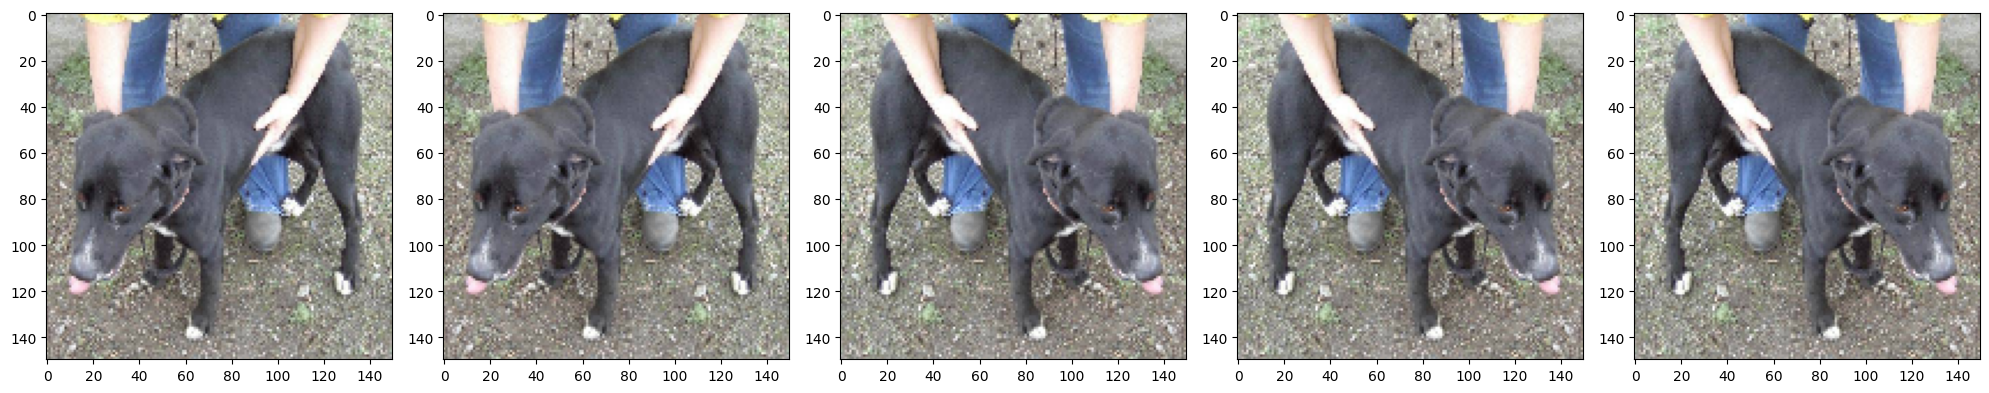

In [15]:
aug_imgs_new = [train_data_gen[0][0][0] for i in range(5)]
plotImages(aug_imgs_new)

In [16]:
#ofcourse the data augmentation is only done for the training set because the val set is already new to the model, we don't need to make more photos the model hasn't seen.

In [17]:
batch_size = 100
imgshape = 150
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=batch_size, directory=val_dir, target_size=(imgshape,imgshape) , class_mode='binary')
#class_mode = can be 

Found 1000 images belonging to 2 classes.


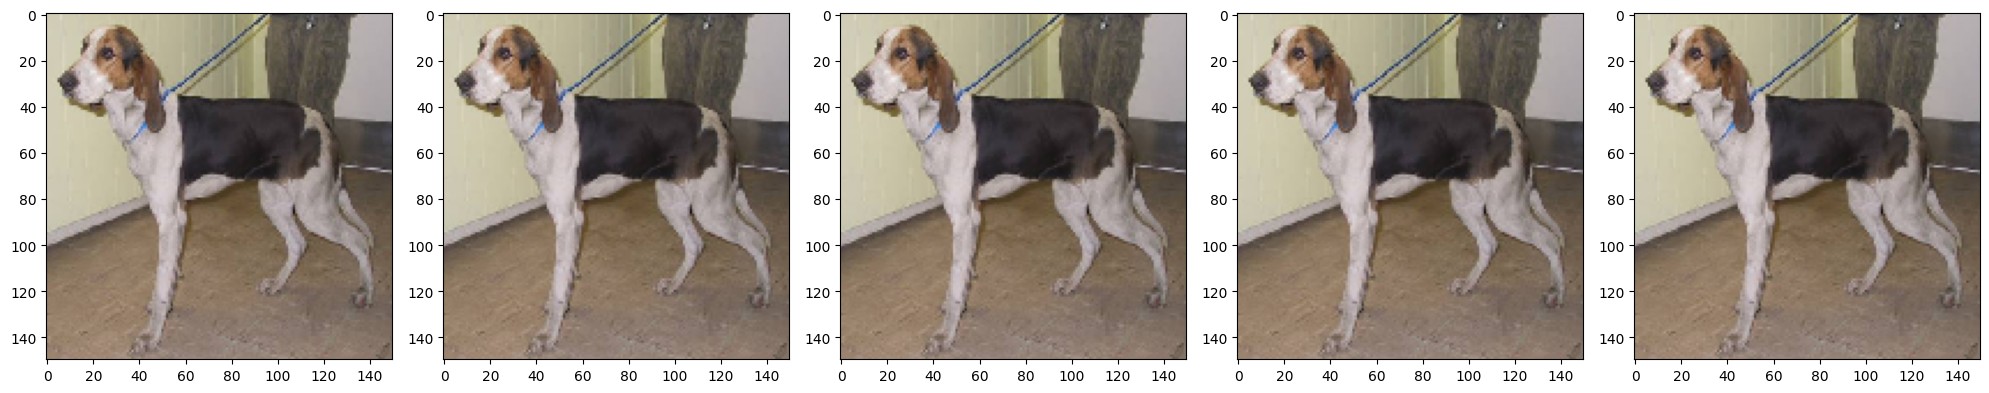

In [18]:
aug_imgs_val = [val_data_gen[0][0][0] for i in range(5)]
plotImages(aug_imgs_val)

In [19]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3), activation = 'relu' , input_shape = (150,150,3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Dropout(0.5),                                     #this means 50% of the neurons will be turned off randomly.
    
    tf.keras.layers.Flatten(),                                        #i can't have a dense layer without a flatten layer.
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    
    tf.keras.layers.Dense(2 , activation = 'softmax')
])

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 74, 74, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 36, 36, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 17, 17, 128)       0

In [21]:
#notice that the number of parameters is very low considering if we had done this task using a vanilla NN.
#this is why you should go to CNN models when you are working with a task related to images.

In [22]:
model.compile(loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              optimizer = 'adam',
              metrics = ['accuracy'])
#from_logits=True: the output of the model is not normalized

In [24]:
epoches = 20
batch_size = 100
history = model.fit(train_data_gen_new,steps_per_epoch = int(np.ceil(total_train/batch_size)),epochs = epoches,validation_data = val_data_gen,validation_steps = int(np.ceil(total_val/batch_size)))
                              


Epoch 1/20
20/20 [==============================] - 37s 2s/step - loss: 0.6932 - accuracy: 0.5040 - val_loss: 0.6913 - val_accuracy: 0.4990
Epoch 2/20
20/20 [==============================] - 30s 1s/step - loss: 0.6931 - accuracy: 0.5080 - val_loss: 0.6930 - val_accuracy: 0.5000
Epoch 3/20
20/20 [==============================] - 29s 1s/step - loss: 0.6929 - accuracy: 0.5130 - val_loss: 0.6914 - val_accuracy: 0.6000
Epoch 4/20
20/20 [==============================] - 29s 1s/step - loss: 0.6921 - accuracy: 0.5390 - val_loss: 0.6890 - val_accuracy: 0.5010
Epoch 5/20
20/20 [==============================] - 29s 1s/step - loss: 0.6901 - accuracy: 0.5250 - val_loss: 0.6882 - val_accuracy: 0.5080
Epoch 6/20
20/20 [==============================] - 29s 1s/step - loss: 0.6874 - accuracy: 0.5260 - val_loss: 0.6904 - val_accuracy: 0.5050
Epoch 7/20
20/20 [==============================] - 29s 1s/step - loss: 0.6918 - accuracy: 0.5145 - val_loss: 0.6872 - val_accuracy: 0.5300
Epoch 8/20
20/20 [==

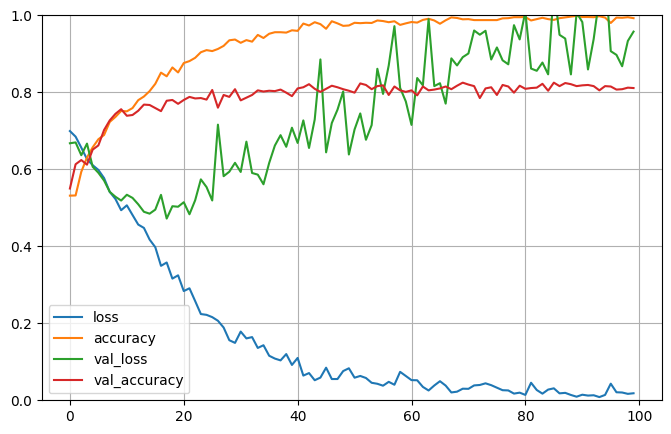

In [ ]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()